# Mineração Estatística de Dados 2019
    Nome: Ricardo França Fernandes do Vale       Número USP: 9293477
    Nome: André Alves Ambrósio                   Número USP: 9762852


## Projeto 4: Clusterização, como interpretar dados por meio de agrupamentos


Este trabalho possui como objetivo utilizar e comparar métodos que agrupam observações através de metodologias diferentes, e assim interpretar qual abordagem é mais eficiente para cada caso.

Neste trabalho serão apresentados os seguintes conceitos:


- K-Means, utilizando Elbow Method para escolha de sementes
- Spectral Clustering
- DBSCAN
- Agglomerative Hierachical Clustering, com métodos average linkage, Ward e Complete linkage

Algumas métricas importantes para se comparar o score são:
- Silhouette, que metrifica em um intervalo de -1 a +1, em que próximo de -1 é uma péssima clusterização e +1 é uma ótima clusterização
- Normalizate mutual information, é uma abordagem de MI na qual facilita a interpretação, variando de 0 a 1, em que 0 não possui informação mútua e próximo de 1 possui uma alta correlação.



##  K-Means: qual o impacto do ruído para o Elbow Method?

Para esta abordagem, iremos simular dados conforme o código abaixo.

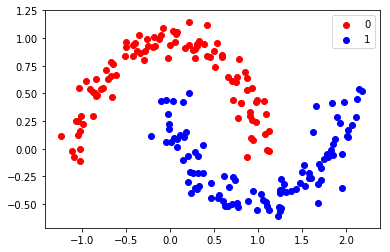

In [4]:
import random
random.seed(1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

# Gerando dataset 2d  de classificacao
n_samples = 200
X1, Y1 = skdata.make_moons(n_samples=n_samples, noise=0.1)

d = np.column_stack((X1,np.transpose(Y1)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(Y1)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(Y1 == c)
    plt.scatter(X1[ind,0][0], X1[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

É difícil categorizar corretamente dados que possuem este formato de lua, pois ao trabalha com centróides, é muito fácil que métodos de agrupamentos formem raios para cada cluster.

Assim, iremos utilizar o método Elbow Scrow, selecionando o K Clusters de acordo com onde começa a formar o "cotovelo" do arco, em relação à métrica distortion.

Make moons com noise=0.1


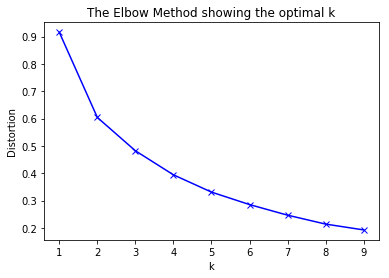




Make moons com noise=0.2


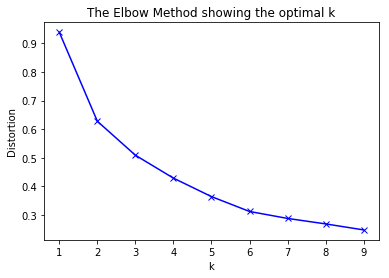




Make moons com noise=0.5


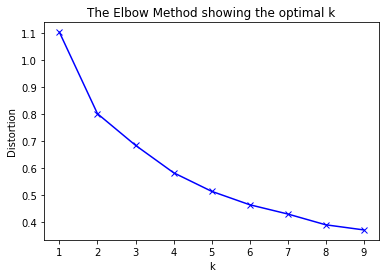




Grafico para k-means com k=2 com 0.1 de ruido
[[-0.24686008  0.58849113]
 [ 1.16926708 -0.03622127]]


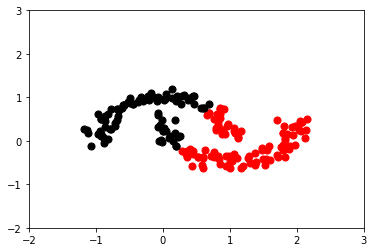

Grafico para k-means com k=2 com 0.2 de ruido
[[-0.19505706  0.53481135]
 [ 1.27778499 -0.03919345]]


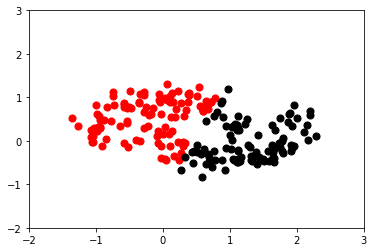

Grafico para k-means com k=2 com 0.5 de ruido
[[ 1.30875999 -0.11098658]
 [-0.33454109  0.56913864]]


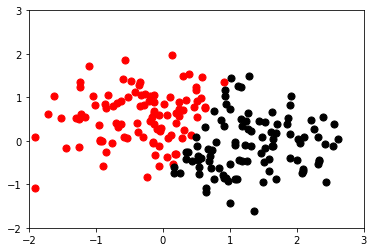

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Gerando os outros dois datasets
X2, Y2 = skdata.make_moons(n_samples=n_samples, noise=0.2)
X3, Y3 = skdata.make_moons(n_samples=n_samples, noise=0.5)

# Determinando o numero de sementes pelo elbow method
def plot_elbow_method(X):
    # k means determinando k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
print('Make moons com noise=0.1')
plot_elbow_method(X1)
print("\n\n")

print('Make moons com noise=0.2')
plot_elbow_method(X2)
print("\n\n")

print('Make moons com noise=0.5')
plot_elbow_method(X3)
print("\n\n")


n_samples=200
X1, Y1 = skdata.make_moons(n_samples=n_samples, noise=0.1)
X2, Y2 = skdata.make_moons(n_samples=n_samples, noise=0.2)
X3, Y3 = skdata.make_moons(n_samples=n_samples, noise=0.5)


print('Grafico para k-means com k=2 com 0.1 de ruido')
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(X1)

plt.scatter(X1[y_km ==0,0], X1[y_km == 0,1], s=50, c='red')
plt.scatter(X1[y_km ==1,0], X1[y_km == 1,1], s=50, c='black')
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.show(True)

print('Grafico para k-means com k=2 com 0.2 de ruido')
kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(X2)

plt.scatter(X2[y_km ==0,0], X2[y_km == 0,1], s=50, c='red')
plt.scatter(X2[y_km ==1,0], X2[y_km == 1,1], s=50, c='black')
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.show(True)

print('Grafico para k-means com k=2 com 0.5 de ruido')
kmeans = KMeans(n_clusters=2)
kmeans.fit(X3)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(X3)

plt.scatter(X3[y_km ==0,0], X3[y_km == 0,1], s=50, c='red')
plt.scatter(X3[y_km ==1,0], X3[y_km == 1,1], s=50, c='black')
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.show(True)


De acordo com os gráficos acima, nota-se que ao variar noise de 0.1 para 0.2 não há uma diferença significativa nos resultados referentes a distortion. Já quando variamos para noise igual a 0.5, a distortion aumenta consideravelmente.

Todavia, a intenção desta abordagem não está em selecionar k em que a distortion se minimiza ou se estabiliza. O foco está em selecionar k no qual há o início da formação do cotovelo, em que há a maior queda de distortion incremental, ou seja, k = 2 para os três casos.

Ainda assim, vemos que quanto mais ruído, embora k seja o mesmo, mais distante se aproxima da realidade a clusterização, em que aos poucos vai perdendo o formato de lua.

# K-Means e Spectral Clustering: qual o impacto do ruído na métrica silhouette

Aqui, iremos comparar duas metodologias de clusterização em relação à métria silhouette, que varia de -1 a +1, em que quão mais próximo de +1, melhor é a clusterização modelada.

E não iremos variar o tamanho de k, pois no item anterior já definimos k ótimo igual a dois para o método K-Means utilizando Elbow Method.


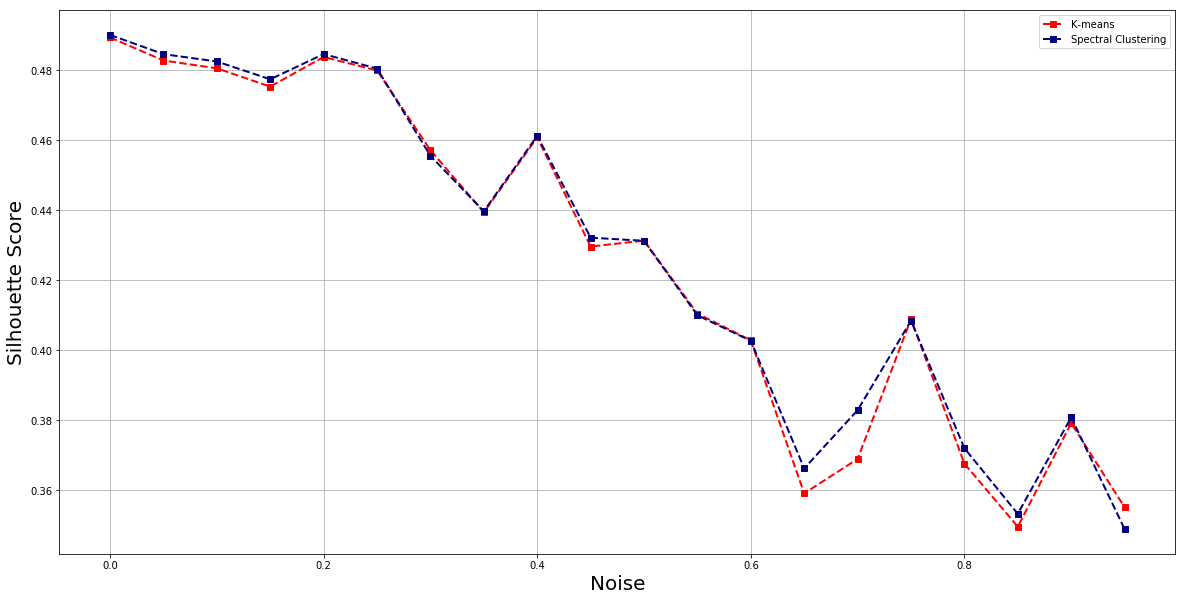

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

noise_range = np.arange(0, 1, 0.05)
kmeans_scores = []
spectral_scores = []
colors=['red', 'navy']

for p in noise_range:
    X, y = skdata.make_moons(n_samples=n_samples, noise=p)
    
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    labels = kmeans.labels_
    kmeans_scores.append(silhouette_score(X, labels, metric='euclidean'))
    
    spc = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
    y_spc = spc.fit_predict(X)
    labels = spc.labels_
    spectral_scores.append(silhouette_score(X, labels, metric='euclidean'))
    
    
# Criando grafico da relacao entre ruido e silhouette score
plt.figure(figsize=(20,10))
plt.plot(noise_range, kmeans_scores, marker='s', linestyle='--', color=colors[0], linewidth=2, label='K-means')
plt.plot(noise_range, spectral_scores, marker='s', linestyle='--', color=colors[1], linewidth=2, label='Spectral Clustering')
plt.legend()
plt.xlabel("Noise", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.grid(True)
plt.show(True)

Como observado na figura acima, temos que ambos métodos possuem comportamento muito semelhante em relação à métrica adotada, independente da proporção de ruído.

E como esperado, quanto maior o ruído, pior será o silhouette score, independente da metodologia.


# DBSCAN: Variando parâmetros e comparando com silhouette score


Aqui, a intenção é variar o tamanho do raio do cluster (eps) e a quantidade mínima de observações por cluster (min_samples). Deste modo, iremos fixar k = 2 e ruído = 0.2.

No handles with labels found to put in legend.


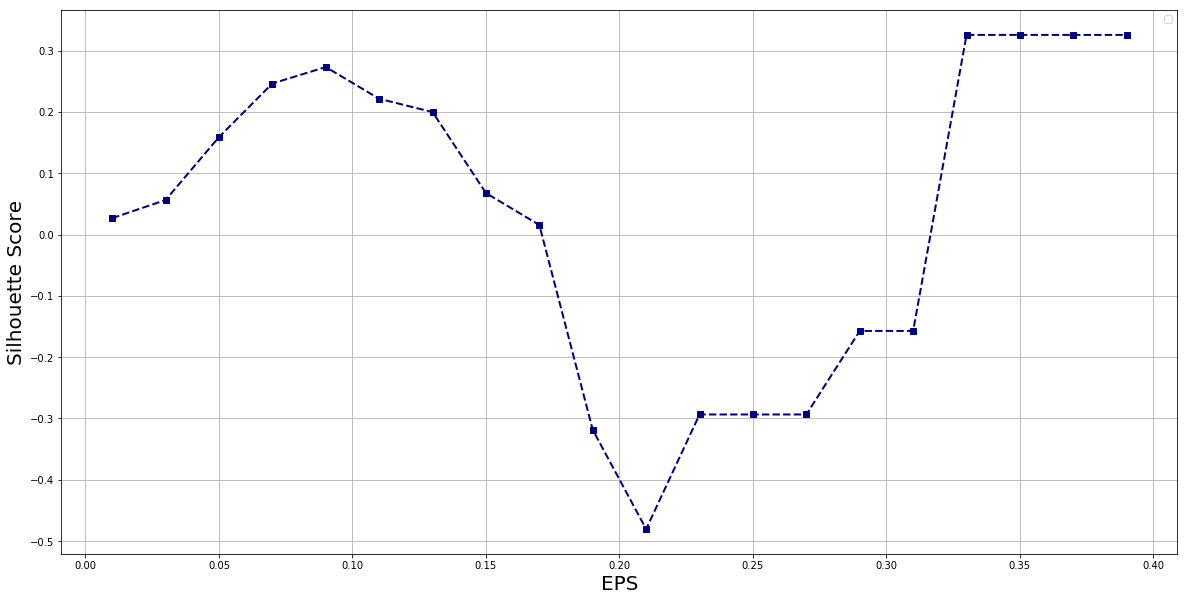

In [6]:
# Variacao de eps
from sklearn.cluster import DBSCAN

X, Y = skdata.make_moons(n_samples=200, noise=0.2)

eps_range = np.arange(0.01, 0.4, 0.02)
scores = []

# Min_samples fixo em 1
for value in eps_range:
    dbscan = DBSCAN(eps=value, min_samples=1).fit(X)
    y_db = dbscan.fit_predict(X)
    labels = dbscan.labels_
    scores.append(silhouette_score(X, labels, metric='euclidean'))
    
# Criando grafico da relacao entre ruido e silhouette score
plt.figure(figsize=(20,10))
plt.plot(eps_range, scores, marker='s', linestyle='--', color='navy', linewidth=2)
plt.legend()
plt.xlabel("EPS", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.grid(True)
plt.show(True)

No gráfico acima, nota-se que o gráfico possui forma de abismo. Inicia com valores medianos para silhouette score, e eps entre 0.10 e 0.30 temos valores horríveis, e após 0.35 a media obtém valores medianos novamente.

Como o intervalo de nossos dados varia de 0 a 1, escolher um raio igual a 40% da amplitude é um tanto quanto arriscado, desta maneira, decidimos escolher eps em torno de 0.10.

No handles with labels found to put in legend.


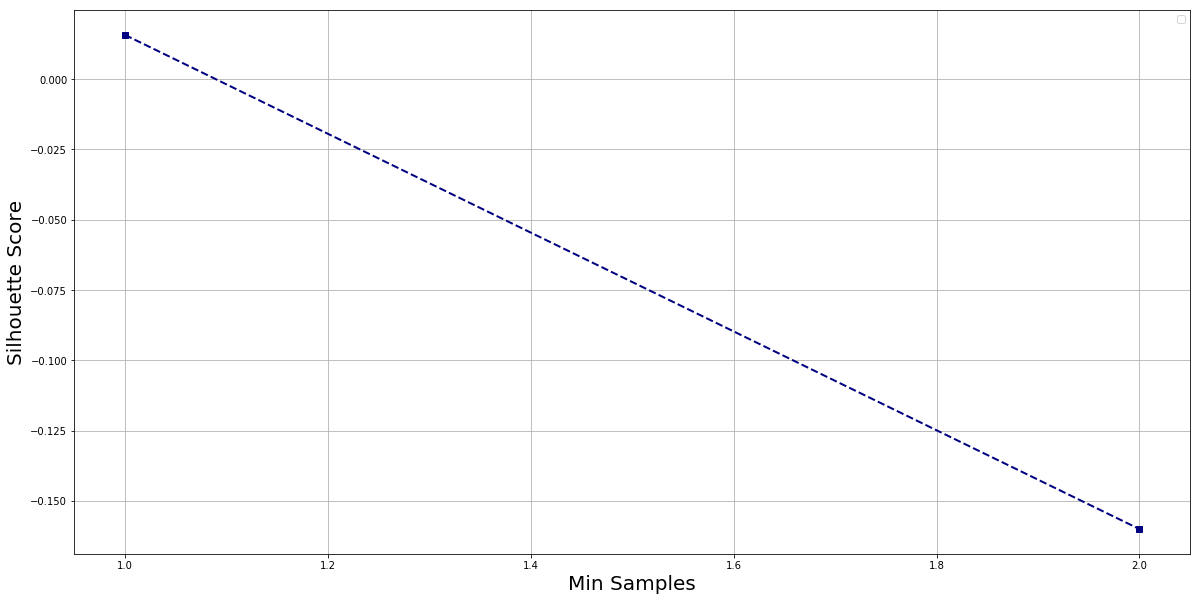

In [89]:
# Variacao de min_smaples
from sklearn.cluster import DBSCAN

X, Y = skdata.make_moons(n_samples=200, noise=0.2)

min_samples = np.arange(1, 3, 1)
scores = []

# eps fixo em 
for value in min_samples:
    dbscan = DBSCAN(eps=0.01, min_samples=value).fit(X)
    y_db = dbscan.fit_predict(X)
    labels = dbscan.labels_
    scores.append(silhouette_score(X, labels, metric='euclidean'))
    
# Criando grafico da relacao entre ruido e silhouette score
plt.figure(figsize=(20,10))
plt.plot(min_samples, scores, marker='s', linestyle='--', color='navy', linewidth=2)
plt.legend()
plt.xlabel("Min Samples", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.grid(True)
plt.show(True)

Diante de algumas experiências variando a quantidade mínima de pontos para se fazer um cluster com um EPS fixo, foi possível observar que o espaço de dados gerado pelo método make_moons possuía dados com um intervalo numérico muito pequeno. 

Dessa forma, para fazer uma análise da variação da quantidade de min samples com um intervalo numérico maior a fim de observar melhor o impacto dessa característica no agrupamento, seria necessário um espaço de dados mais vasto. Na configuração existente, foram testadas uma variação de raios (EPS). Para um EPS pequeno, à medida que min_samples cresce, o agrupamento das entradas é feito em apenas um cluster. Para um EPS grande, com min_samples igual a 1, apenas um cluster era o agrupamento da entrada; e isto não é agrupamento.

# Dendogramas: comparação para diferentes linkages do Agglomerative Hierarchical Clustering e uma abordagem com PCA

Aqui, o foco está em abordar a clusterização por meio de uma metodologia hierárquica, que são os dendogramas aglomerativos, em que a quantidade de clusters é definida por meio de cortes na árvore, e que para cada ponto de corte, temos uma quantidade de clusters definida.

Métodos como dendogramas são úteis como uma análise exploratória antes de se iniciar modelos de clusterização mais robustos, pois embora nem sempre sejam eficientes, normalmente fornecem um direcionamento sobre o comportamento dos dados estudados.

Iremos verificar diferenças e tendências para os linkages Average, Ward e Complete. E também iremos abordar com PCA, mixando as duas metodologias.

In [17]:
iris = pd.read_csv('./iris.csv', header=(0))
print(iris.shape)
iris.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


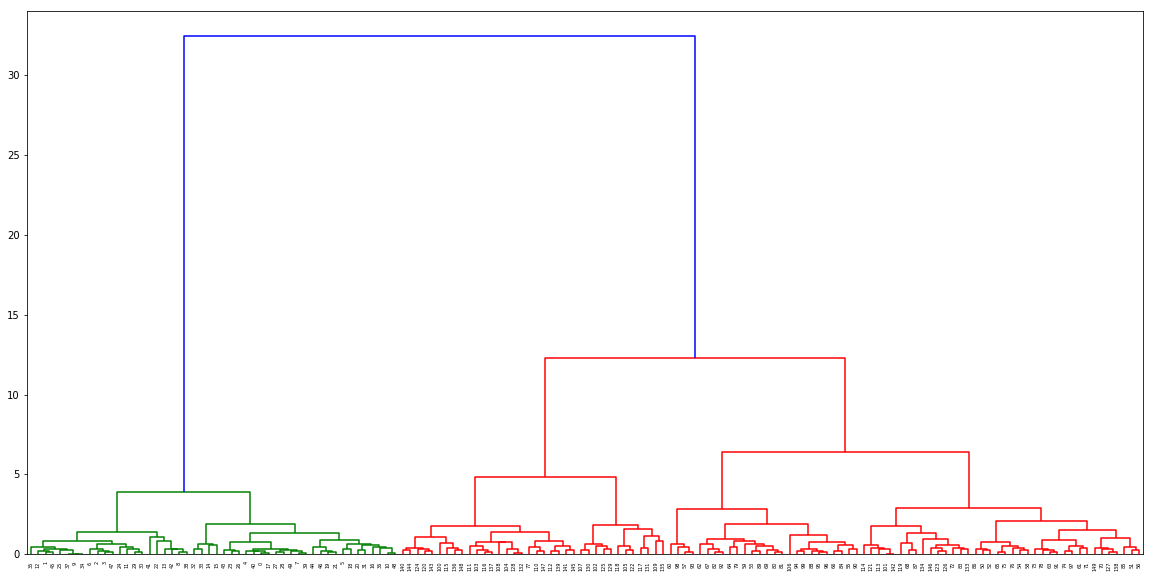

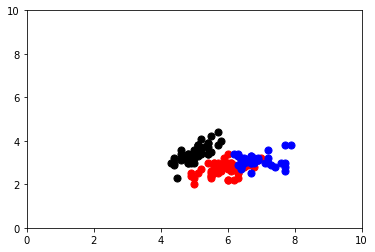

In [29]:
# Dendogramas
# Ward method
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

X = np.array(iris.drop(iris.columns[-1], axis = 1))
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show(True)

# Criacao de 3 clusters por causa da quantidade de classes possiveis da Iris
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show(True)

Para o Ward, temos que um possível ponto de corte é em 3 clusters, o que coincide com os dados originais.

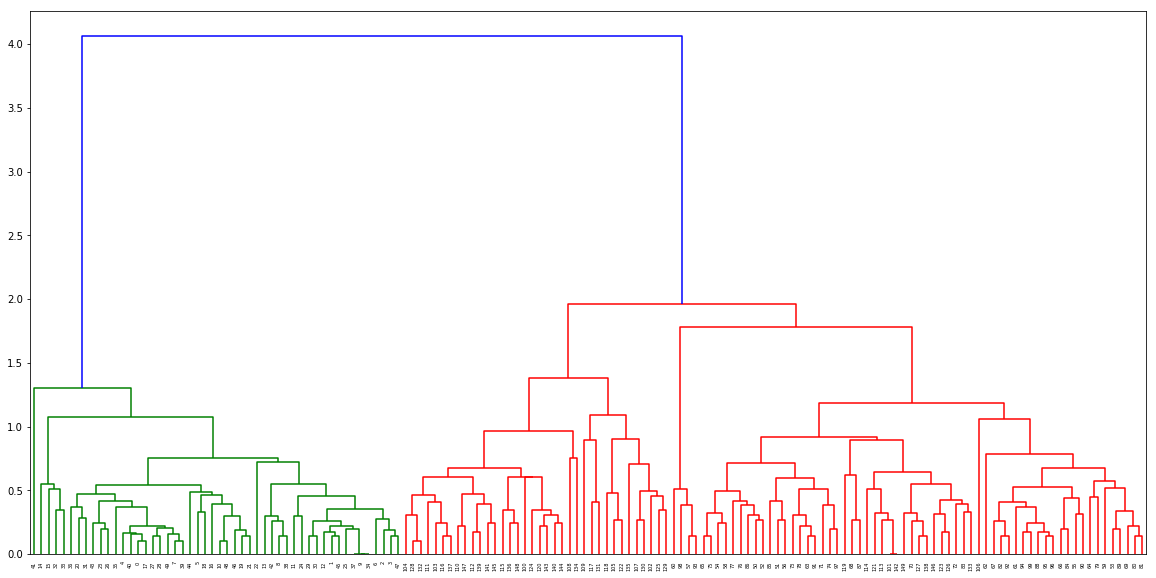

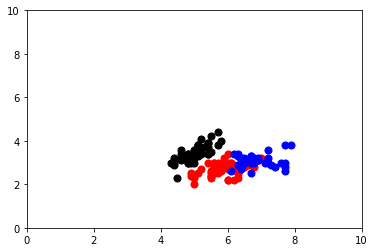

In [19]:
# Dendogramas
# Average Linkage method

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
plt.show(True)

# Criacao de 3 clusters por causa da quantidade de classes possiveis da Iris
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show(True)

Já para Average Linkage, a escolha da quantidade de clusters é um tanto quanto complicada, pois não há uma real diferença entre a escolha de 3 ou 4 clusters, e há quem possa preferir selecionar apenas 2 clusters, dada essa alta semelhança entre 3 e 4.

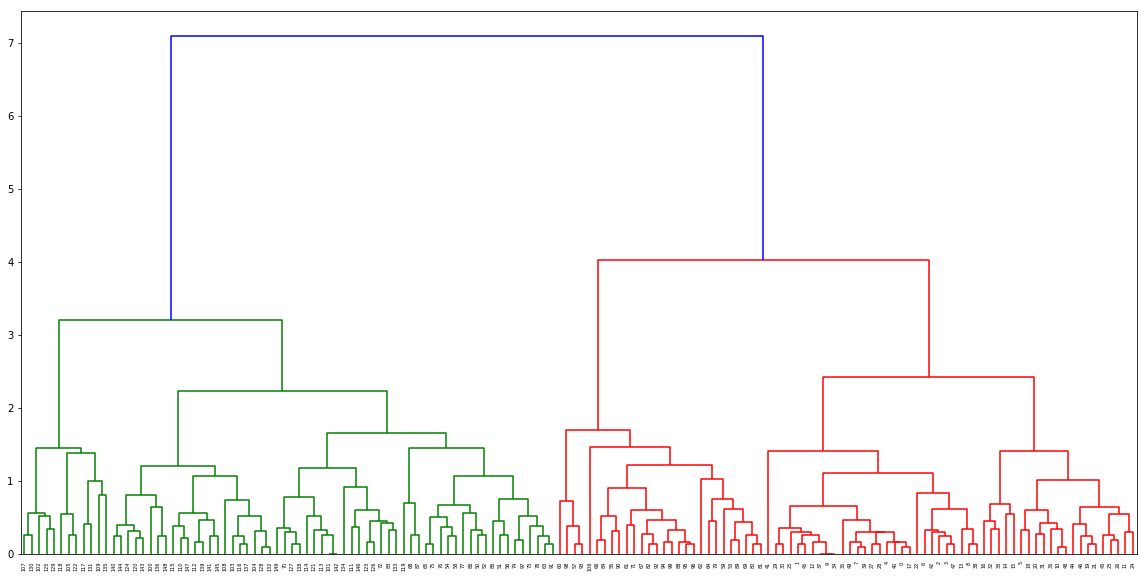

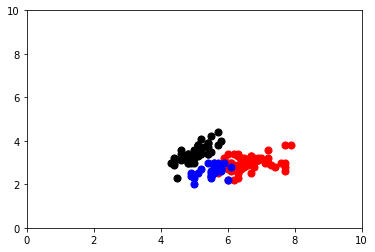

In [20]:
# Dendogramas
# Complete Linkage method

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show(True)

# Criacao de 3 clusters por causa da quantidade de classes possiveis da Iris
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show(True)

Para o Complete Linkage há uma incerteza menor em relação ao método anterior, a dúvida paira sobre 2 ou 3 clusters, todavia parece mais estratégico escolher 3 clusters.


Baseado nessas conclusões por meio de uma análise ocular, temos que o algoritmo por trás do Ward é o mais eficiente para os dados Iris, pois se assemelha mais aos dados em questão.

Todavia, o melhor é embasarmos a decisão para métodos como por exemplo utilizar o silhouette score, comparando os linkages variando o tamanho de k.



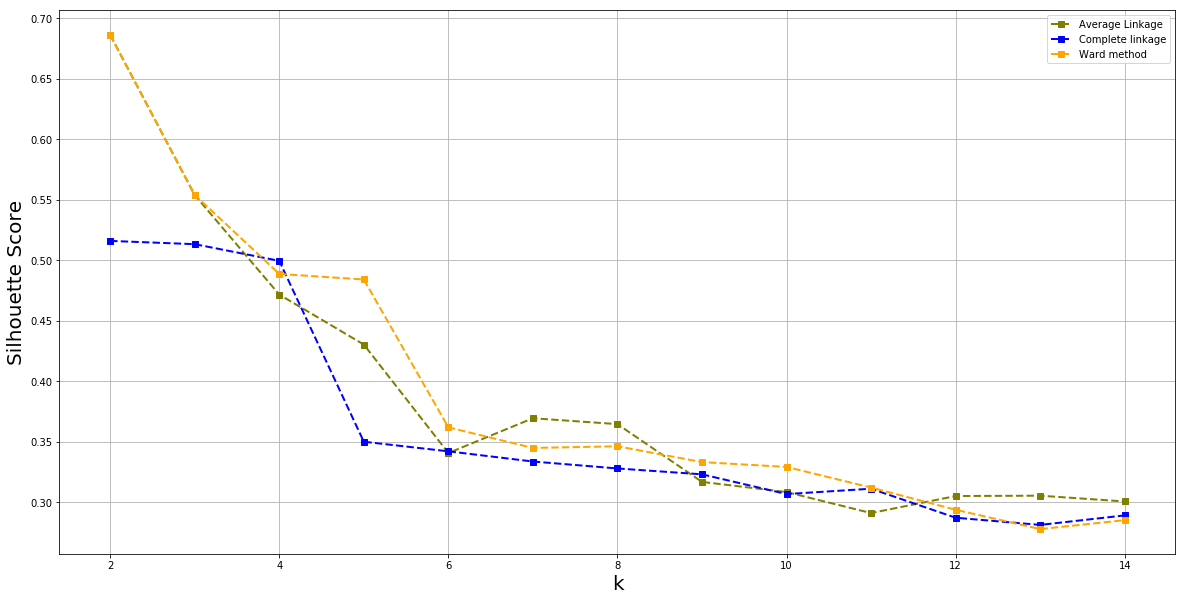

In [21]:
# Encontrando melhor valor de k
# Plottando silhouette score
k_range = np.arange(2, 15, 1)
AL_scores = []
CL_scores = []
ward_scores = []
colors=['olive', 'blue', 'orange']

for k in k_range:    
    hc = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'complete')
    y_hc = hc.fit_predict(X)
    labels = hc.labels_
    CL_scores.append(silhouette_score(X, labels, metric='euclidean'))
    
    hc = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'average')
    y_hc = hc.fit_predict(X)
    labels = hc.labels_
    AL_scores.append(silhouette_score(X, labels, metric='euclidean'))
    
    hc = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    labels = hc.labels_
    ward_scores.append(silhouette_score(X, labels, metric='euclidean'))
        
    
# Criando grafico da relacao entre k e silhouette score
plt.figure(figsize=(20,10))
plt.plot(k_range, AL_scores, marker='s', linestyle='--', color=colors[0], linewidth=2, label='Average Linkage')
plt.plot(k_range, CL_scores, marker='s', linestyle='--', color=colors[1], linewidth=2, label='Complete linkage')
plt.plot(k_range, ward_scores, marker='s', linestyle='--', color=colors[2], linewidth=2, label='Ward method')
plt.legend()
plt.xlabel("k", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.grid(True)
plt.show(True)

E pelo gráfico acima, temos que a decisão mais coesa a se tomar, baseado nesta métrica é utilizar o Ward method para 2 clusters.

#### PCA
Agora, iremos utilizar a metodologia de Análise de Componentes Principais para tentar reduzir a quantidade de covariáveis por meio dos componentes principais e aplicar dendograma novamente.

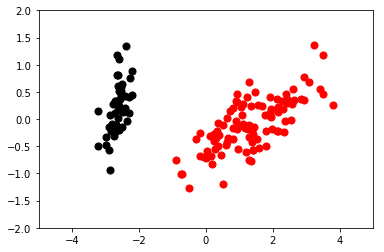

In [31]:
# PCA reduzindo espaco de entrada para 2 dimensoes para plottarmos os clusters
# A escolha sera de 2 clusters para o metodo aglomerativo hierarquico com average linkage
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
XS = pca_result

hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(XS)

plt.scatter(XS[y_hc ==0,0], XS[y_hc == 0,1], s=50, c='red')
plt.scatter(XS[y_hc==1,0], XS[y_hc == 1,1], s=50, c='black')
plt.xlim(-5,5)
plt.ylim(-2,2)
plt.show(True)

Temos que para o método PCA foi dividido em dois principais cluster bem distintos entre si. O que evidencia uma certa distância da realidade dos dados.

## Normalized Mutual Info Score

O Normalized Mutual Information Score é uma maneira de medir a eficiência de um algoritmo de agrupamento, observando as similaridades entre a saída predita, contendo a informação de cada observação indexada sobre o cluster ao qual pertence, e a saída correta. A intenção neste próximo bloco de código é observar o quão efetivos os métodos de agrupamento são, sendo possível realizar um paralelo sobre suas advinhações e os rótulos corretos.

Os algoritmos de agrupamento que serão testados são: K-means, Spectral Clustering, DBSCAN e método aglomerativo hierárquico. Será fixado k=3 para determinar a quantidade de clusters, já que é conhecimento do problema que existem 3 possibilidades para uma classe.

In [30]:
# Todos os algoritmos irão considerar 3 clusters devido a existencia de 3 classes na IRIS
from sklearn.metrics.cluster import normalized_mutual_info_score

X = np.array(iris.drop(iris.columns[-1], axis = 1))
classes = np.array(iris[iris.columns[-1]])
y = np.zeros(len(classes))

# mapeamento de classes para inteiros
for i in range(0, len(classes)):
    if (classes[i] == "setosa"): y[i] = 0
    elif (classes[i] == "versicolor"): y[i] = 1 
    elif (classes[i] == "virginica"): y[i] = 2

# definicao dos algoritmos
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
km_labels = kmeans.labels_

spc = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X)
y_spc = spc.fit_predict(X)
spc_labels = spc.labels_

dbscan = DBSCAN(eps=1, min_samples=5).fit(X)
y_db = dbscan.fit_predict(X)
dbscan_labels = dbscan.labels_

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
cl_hc_labels = hc.labels_

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)
al_hc_labels = hc.labels_

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
ward_hc_labels = hc.labels_

# Calculo dos scores
df_metrics = pd.DataFrame(
    {
        "Algoritmo de clustering" : ['K-Means', 'Spectral Clustering', 'DBSCAN', 'AHC Complete Linkage', 'AHC Average Linkage', 'AHC Ward'],
        "Normalized Mutual Information Score" :
            [
                normalized_mutual_info_score(km_labels, y),
                normalized_mutual_info_score(spc_labels, y),
                normalized_mutual_info_score(dbscan_labels, y),
                normalized_mutual_info_score(cl_hc_labels, y),
                normalized_mutual_info_score(al_hc_labels, y),
                normalized_mutual_info_score(ward_hc_labels, y)
            ]    
    }
)
df_metrics

,Algoritmo de clustering,Normalized Mutual Information Score
0,K-Means,0.758206
1,Spectral Clustering,0.766057
2,DBSCAN,0.761170
3,AHC Complete Linkage,0.722422
4,AHC Average Linkage,0.805754
5,AHC Ward,0.770141


Os valores possíveis a serem atingidos por essa métrica estão no intervalo entre 0 e 1, onde 0 indica dados não correlatos e 1 indica similaridade entre os dados passados como parâmetro.

Através dos valores de normalização mútua, é possível observar que os métodos de agrupamento utilizados possuem índices de correlação entre predição e saída esperada muito próximos entre si, sendo, em geral, bons índices, devido ao valor mais próximo de 1. O método de agrupamento mais adequado perante à medida do score da noemalização mútua de informação é o método aglomerativo hierárquico com ligação média, sendo o método aglomerativo hierárquico de ligação completa o que apresenta menor correlação entre predição e resposta correta.